<a href="https://colab.research.google.com/github/peeyushsinghal/EVA8/blob/main/S7-Assignment-Solution/EVA8_S7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#@title importing model, mains, utils
!git clone https://github.com/peeyushsinghal/pytorch-models-utils.git
import os
os.getcwd() 
os.chdir('pytorch-models-utils')

Cloning into 'pytorch-models-utils'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 50 (delta 18), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (50/50), 17.43 KiB | 1.34 MiB/s, done.


In [42]:
#@title setting seed and device

# loading helper functions
from utils.helper import seed_all, get_device, get_mean_std_dev

# check for default device

device = get_device()
print (f' device Status : {device}')

 device Status : cuda


In [43]:
## setting seed for reproducibility
SEED = 42 # arbit seed, why 42 - because in hitch hikers guide to galaxy it is answer to everything
seed_all(SEED)

In [44]:
#@title Preparing Data

from utils.helper import get_mean_std_dev

# getting mean and standard deviation of CIFAR 10
mean,std = get_mean_std_dev('CIFAR10')
print (mean, std)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./
(0.4913996786152028, 0.4821584083946074, 0.4465309144454644) (0.24703223246328238, 0.2434851280000556, 0.26158784172796423)


In [45]:
#@title applying transformations
from utils.transforms import apply_transforms_resnet

train_transforms, test_transforms = apply_transforms_resnet(mean,std)

In [46]:
#@title Train and Test Data

from torchvision import datasets

trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transforms)

testset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transforms)


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [47]:
#@title Labels
labels = trainset.classes
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [48]:
#@title Train and Test set Dataloader

import torch
batch_size = 128

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

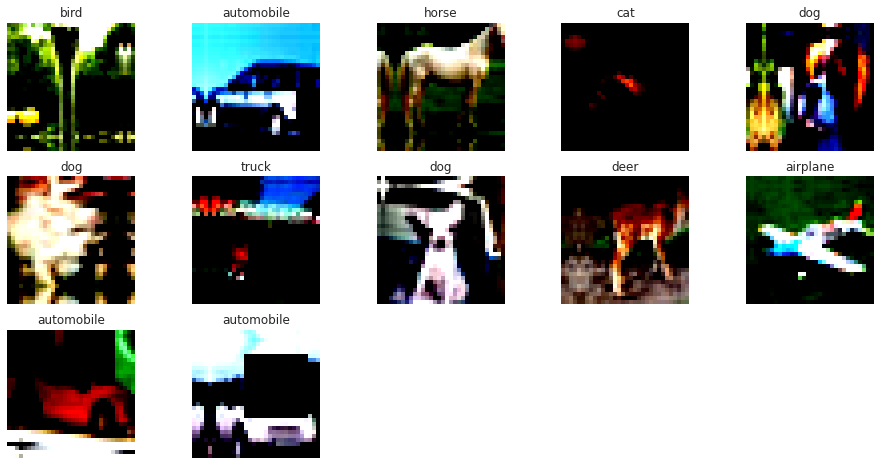

In [49]:
#@title Visualizing Images

from utils.plot_utils import show_batch
show_batch(trainloader,labels,num_images=12) # for visualizing images

In [50]:
#@ Network : Loading Model and understand params, summary
from models.resnet import ResNet18 # Model
from utils.helper import model_summary

model = ResNet18().to(device)

model_summary(model, input_size =(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [55]:
#@title Training and Testing loop

import torch.optim as optim # for optimizer
import torch.nn as nn # for network, criterion
import torch.nn.functional as F 


criterion = nn.CrossEntropyLoss()

# epochs = 40
epochs = 20
lr = 0.1

optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# optimizer = optim.Adam(model.parameters(), lr=lr)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',\
                                                 factor=0.1, patience=3, threshold=0.0001, threshold_mode='abs')

In [56]:
from main import trainer, train, test # including wrapper function of train and test
train_accuracy, train_losses, test_accuracy, test_losses = trainer(model,device, trainloader, testloader, optimizer,epochs,criterion,scheduler)


EPOCH: 1


Loss=1.6754226684570312 Batch_id=390 Accuracy=39.86: 100%|██████████| 391/391 [01:02<00:00,  6.30it/s]



Test set: Average loss: 0.0002, Accuracy: 4308/10000 (43.08%)

EPOCH: 2


Loss=1.6538774967193604 Batch_id=390 Accuracy=39.81: 100%|██████████| 391/391 [01:01<00:00,  6.32it/s]



Test set: Average loss: 0.0001, Accuracy: 4298/10000 (42.98%)

EPOCH: 3


Loss=1.814955472946167 Batch_id=390 Accuracy=39.67: 100%|██████████| 391/391 [01:01<00:00,  6.38it/s]



Test set: Average loss: 0.0002, Accuracy: 4305/10000 (43.05%)

EPOCH: 4


Loss=1.6880943775177002 Batch_id=390 Accuracy=39.56: 100%|██████████| 391/391 [01:01<00:00,  6.37it/s]



Test set: Average loss: 0.0002, Accuracy: 4308/10000 (43.08%)

EPOCH: 5


Loss=1.5589604377746582 Batch_id=390 Accuracy=39.70: 100%|██████████| 391/391 [01:01<00:00,  6.39it/s]



Test set: Average loss: 0.0001, Accuracy: 4315/10000 (43.15%)

EPOCH: 6


Loss=1.6629114151000977 Batch_id=390 Accuracy=39.67: 100%|██████████| 391/391 [01:01<00:00,  6.37it/s]



Test set: Average loss: 0.0001, Accuracy: 4295/10000 (42.95%)

EPOCH: 7


Loss=1.5869039297103882 Batch_id=390 Accuracy=39.84: 100%|██████████| 391/391 [01:01<00:00,  6.38it/s]



Test set: Average loss: 0.0001, Accuracy: 4304/10000 (43.04%)

EPOCH: 8


Loss=1.6641371250152588 Batch_id=390 Accuracy=39.72: 100%|██████████| 391/391 [01:01<00:00,  6.38it/s]



Test set: Average loss: 0.0001, Accuracy: 4303/10000 (43.03%)

EPOCH: 9


Loss=1.607785940170288 Batch_id=390 Accuracy=39.75: 100%|██████████| 391/391 [01:01<00:00,  6.39it/s]



Test set: Average loss: 0.0002, Accuracy: 4303/10000 (43.03%)

EPOCH: 10


Loss=1.7281261682510376 Batch_id=390 Accuracy=39.73: 100%|██████████| 391/391 [01:01<00:00,  6.37it/s]



Test set: Average loss: 0.0002, Accuracy: 4300/10000 (43.00%)

EPOCH: 11


Loss=1.5922601222991943 Batch_id=390 Accuracy=39.75: 100%|██████████| 391/391 [01:01<00:00,  6.38it/s]



Test set: Average loss: 0.0001, Accuracy: 4290/10000 (42.90%)

EPOCH: 12


Loss=1.6203954219818115 Batch_id=390 Accuracy=39.43: 100%|██████████| 391/391 [01:01<00:00,  6.40it/s]



Test set: Average loss: 0.0001, Accuracy: 4300/10000 (43.00%)

EPOCH: 13


Loss=1.5137598514556885 Batch_id=390 Accuracy=39.77: 100%|██████████| 391/391 [01:01<00:00,  6.39it/s]



Test set: Average loss: 0.0002, Accuracy: 4292/10000 (42.92%)

EPOCH: 14


Loss=1.6400705575942993 Batch_id=390 Accuracy=39.95: 100%|██████████| 391/391 [01:01<00:00,  6.37it/s]



Test set: Average loss: 0.0002, Accuracy: 4316/10000 (43.16%)

EPOCH: 15


Loss=1.693129539489746 Batch_id=390 Accuracy=39.81: 100%|██████████| 391/391 [01:01<00:00,  6.39it/s]



Test set: Average loss: 0.0001, Accuracy: 4309/10000 (43.09%)

EPOCH: 16


Loss=1.5046852827072144 Batch_id=390 Accuracy=39.88: 100%|██████████| 391/391 [01:01<00:00,  6.40it/s]



Test set: Average loss: 0.0001, Accuracy: 4302/10000 (43.02%)

EPOCH: 17


Loss=1.5729395151138306 Batch_id=390 Accuracy=40.02: 100%|██████████| 391/391 [01:01<00:00,  6.37it/s]



Test set: Average loss: 0.0001, Accuracy: 4291/10000 (42.91%)

EPOCH: 18


Loss=1.5082510709762573 Batch_id=390 Accuracy=39.80: 100%|██████████| 391/391 [01:01<00:00,  6.35it/s]



Test set: Average loss: 0.0002, Accuracy: 4308/10000 (43.08%)

EPOCH: 19


Loss=1.6962463855743408 Batch_id=390 Accuracy=39.76: 100%|██████████| 391/391 [01:01<00:00,  6.38it/s]



Test set: Average loss: 0.0001, Accuracy: 4301/10000 (43.01%)

EPOCH: 20


Loss=1.6320178508758545 Batch_id=390 Accuracy=39.67: 100%|██████████| 391/391 [01:01<00:00,  6.39it/s]



Test set: Average loss: 0.0002, Accuracy: 4309/10000 (43.09%)



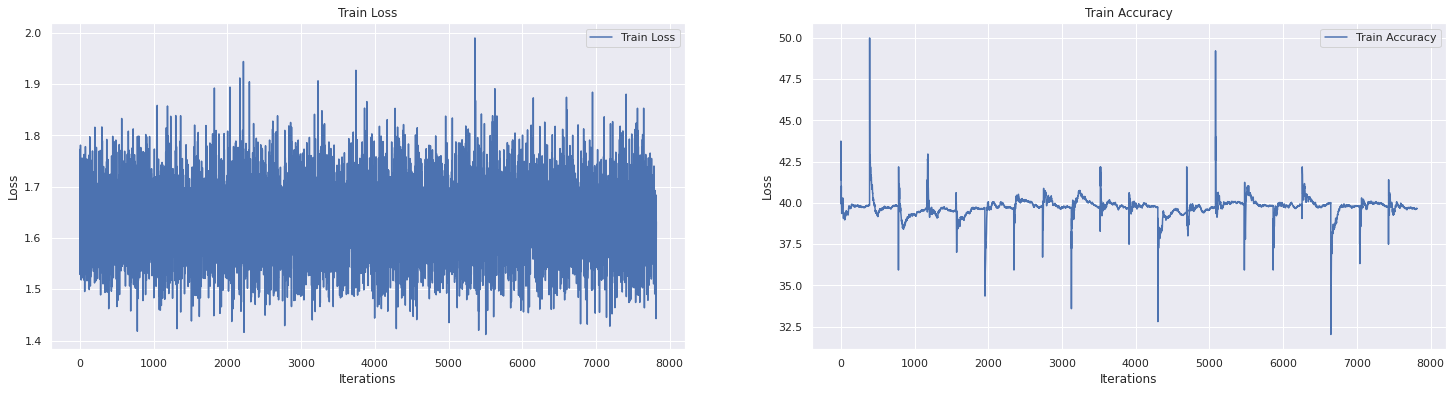

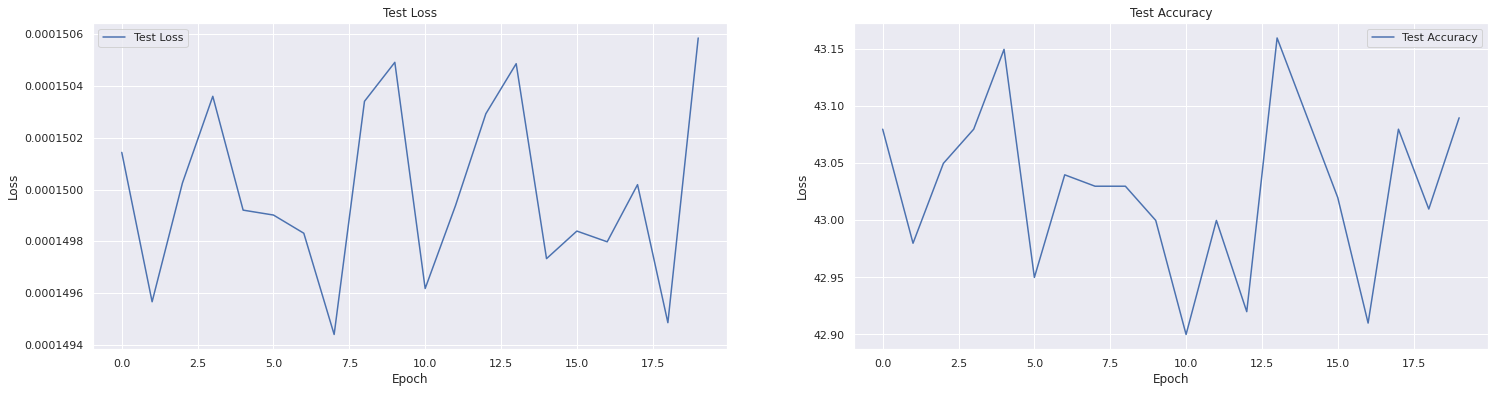

In [57]:
#@title checking results
from utils.plot_utils import plot_metrics

plot_metrics(train_accuracy, [x.cpu().detach().numpy() for x in train_losses], test_accuracy, test_losses)

In [58]:
#@title Checking class level accuracy
from utils.helper import evaluate_classwise_accuracy
evaluate_classwise_accuracy(model, device, labels, testloader)

Accuracy of airplane : 37 %
Accuracy of automobile : 60 %
Accuracy of  bird : 15 %
Accuracy of   cat :  2 %
Accuracy of  deer : 18 %
Accuracy of   dog : 69 %
Accuracy of  frog : 55 %
Accuracy of horse : 52 %
Accuracy of  ship : 68 %
Accuracy of truck : 43 %


Total wrong predictions are 5691


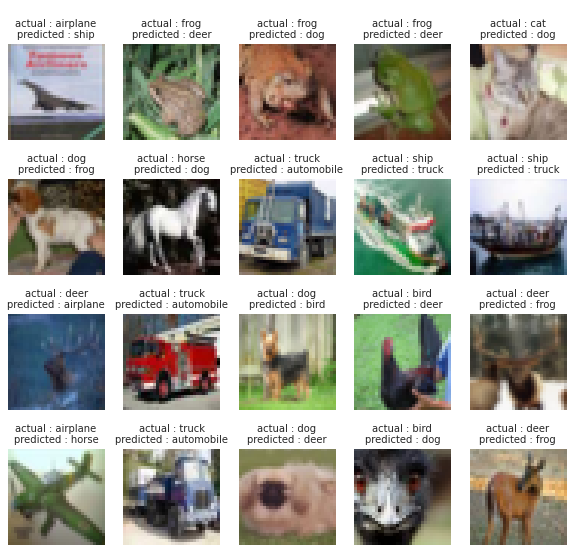

In [59]:
#@title Misclassified Images
from utils.plot_utils import misclassified_images

images_misclassified = misclassified_images(model, testloader, device, mean, std)

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1117: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


Generating Grad-CAM for layer1
Generating Grad-CAM for layer2
Generating Grad-CAM for layer3
Generating Grad-CAM for layer4


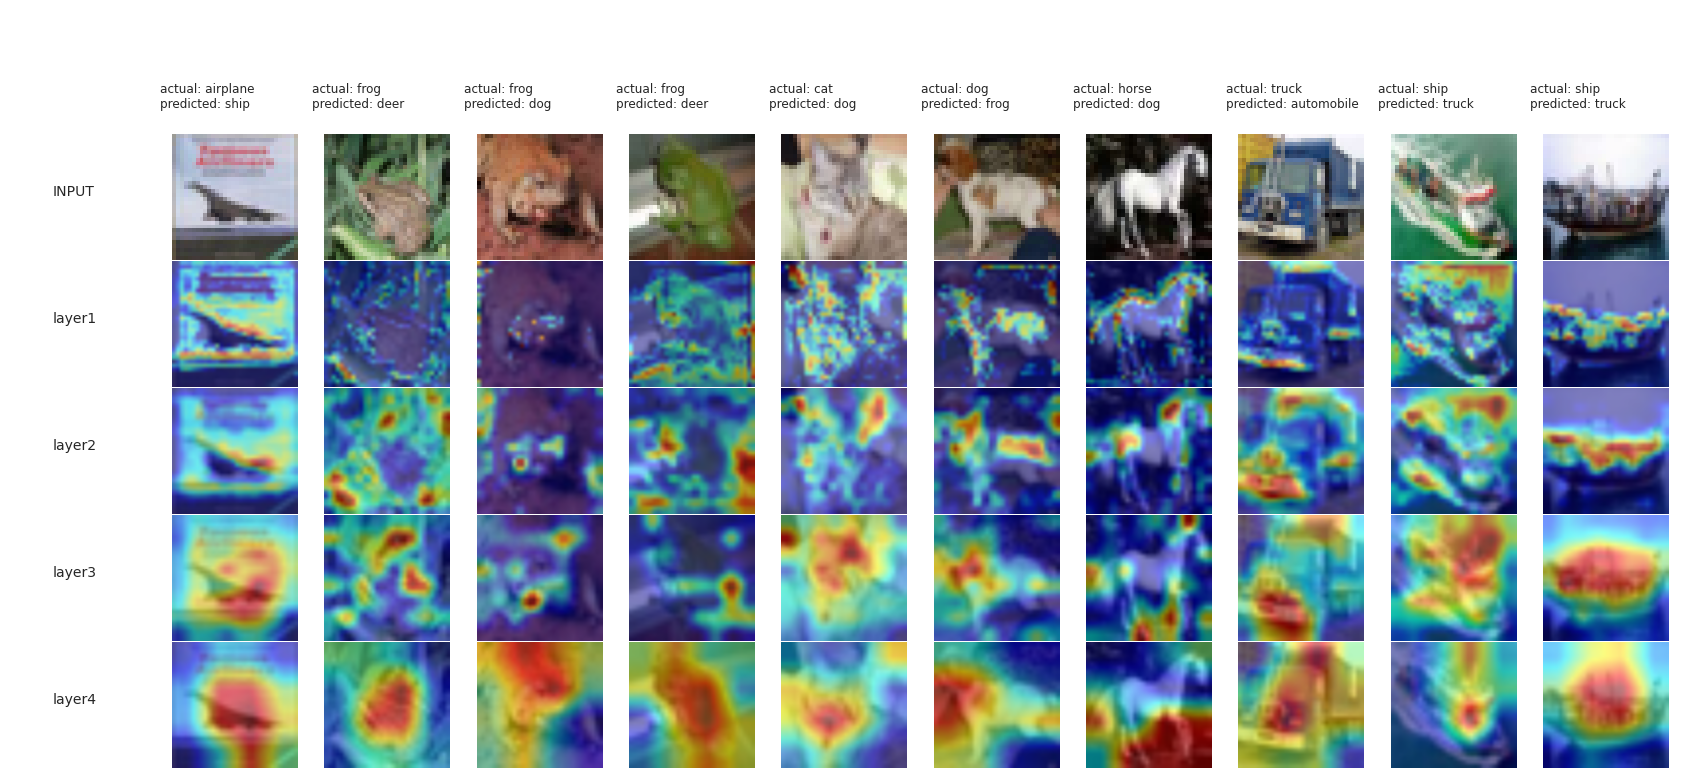

In [60]:
#@title Grad Cam on misclassified images

from utils.grad_cam import generate_gradcam, plot_gradcam

target_layers = ["layer1", "layer2", "layer3", "layer4"]
gradcam_output, probs, predicted_classes = generate_gradcam(images_misclassified[:10], model, target_layers, device)
plot_gradcam(gradcam_output, target_layers, labels, (3, 32, 32), predicted_classes, images_misclassified[:10])